<a href="https://colab.research.google.com/github/QuangLe102/AI/blob/main/BT1_ANN_Nhandienkhuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

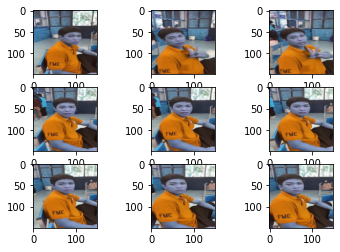

In [12]:
#import thư viện

from sklearn.utils import shuffle

import math as m

import cv2
import pickle
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from sklearn.preprocessing import scale
from keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten
from tensorflow.keras.utils import to_categorical 

with open('anhchandung.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)
x_pre = x_train
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [13]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [14]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_train = x_train.astype('float32')
y_train = np_utils.to_categorical(y_train, 2)
x_train, y_train = shuffle(x_train, y_train)
x_train /= 255
x_train[0]
y_train.shape

(90, 2)

In [63]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (67500,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 30, validation_split = 0.2)

Epoch 1/30
3/3 [==============================] - 1s 128ms/step - loss: 1.4535 - accuracy: 0.4444 - val_loss: 1.0648 - val_accuracy: 0.5556
Epoch 2/30
3/3 [==============================] - 0s 38ms/step - loss: 1.5038 - accuracy: 0.7222 - val_loss: 0.5065 - val_accuracy: 0.6111
Epoch 3/30
3/3 [==============================] - 0s 36ms/step - loss: 0.6264 - accuracy: 0.6111 - val_loss: 0.4449 - val_accuracy: 0.5556
Epoch 4/30
3/3 [==============================] - 0s 36ms/step - loss: 0.3249 - accuracy: 0.8889 - val_loss: 0.2324 - val_accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 0s 36ms/step - loss: 0.1778 - accuracy: 1.0000 - val_loss: 0.1245 - val_accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 0s 42ms/step - loss: 0.1140 - accuracy: 1.0000 - val_loss: 0.0617 - val_accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 0s 37ms/step - loss: 0.0558 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 8/30
3/3 [==========

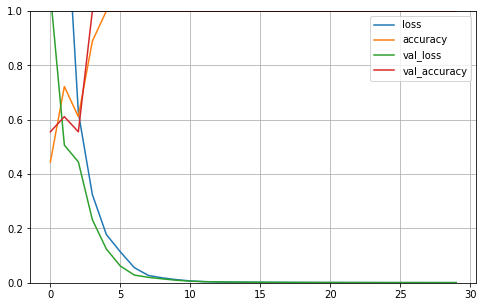

In [64]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

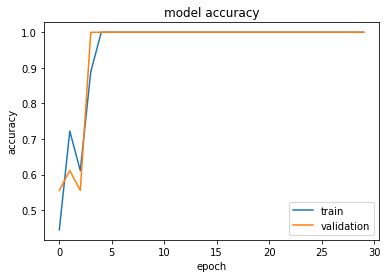

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

[1]


'Đây là Chiến'

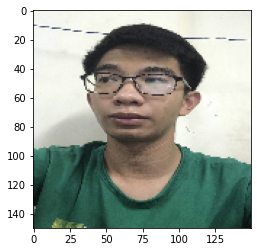

In [66]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('88.jpg', target_size = (150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, -1)
img = img.astype('float32')
img = img / 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Đây không phải Chiến', 'Đây là Chiến']
Label[pred[0]]

[0]


'Đây không phải Chiến'

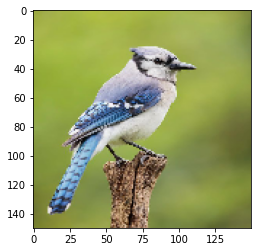

In [75]:
img = load_img('chim.jpg', target_size = (150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, -1)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Đây không phải Chiến', 'Đây là Chiến']
Label[pred[0]]